In [23]:
# Rongmon, this is an thisgal notebook to show you how to access the MagE spectra.  
# It reads in the stacked spectra and the individual MagE spectra.
# I then show you how to address individual spectra, and plot SiII, SiIV.  
import jrr
import numpy as np
import pandas
import matplotlib.pyplot as plt
%matplotlib inline
mage_mode = "released"

In [3]:
# Load the stacked spectra
# Stack A has been normalized by median continuum ~1270A.
(stackA, LL) = jrr.mage.open_stacked_spectrum(mage_mode, which_stack="Stack-A", addS99=True)
# std stack has been normalized by hand-fit continuum.  Has flat spectral slope
(stack_std, LL) = jrr.mage.open_stacked_spectrum(mage_mode, which_stack="standard", addS99=True)

In [5]:
# Load all the MagE spectra
(sp, resoln, dresoln, LL, zz_sys, speclist) = jrr.mage.open_many_spectra(mage_mode, verbose=False)

Loading MagE spectra in advance; this may be slow, but worthwhile if doing a lot of back and forth.


In [9]:
# the index of speclist is "short_label", which is unique names of the spectra
speclist.tail(2)

,origdir,filename,short_label,z_stars,sig_st,fl_st,z_neb,sig_neb,fl_neb,z_ISM,sig_ISM,fl_ISM,NOTES,z_syst,dz_syst
short_label,,,,,,,,,,,,,,,
S2111-0114,S2111m0114/,s2111-combwC1.txt,S2111-0114,2.859877,0.00165,False,2.8577,-999.00000,True,2.858300,0.0007,False,foo,2.85988,0.00165
Cosmic~Eye,Cosmic_eye/,cosmiceye-combwC1.txt,Cosmic~Eye,3.074834,0.00040,False,3.0735,0.00024,False,3.072358,0.0003,False,zneb_zism_from_Quider+10;_ISM_has_multiple_zs,3.07483,0.0004


In [27]:
# The spectra are stored in sp, with label in speclist['short_label'].  For thisgal:
print "Stellar redshift for Cosmic Eye: ", speclist.ix['Cosmic~Eye']['z_stars']
thisgal = speclist['short_label'][5]
print "Let's pick an example galaxy:", thisgal
print sp[thisgal].keys()  # All the column names in the spectrum
sp[thisgal].head(2)
# The main colums you would care about are wave, fnu, rest_wave, rest_fnu.

Stellar redshift for Cosmic Eye:  3.074834
Let's pick an example galaxy: S0004-0103
Index([u'wave', u'fnu', u'fnu_u', u'wave_sky', u'fnu_sky', u'fnu_cont',
       u'fnu_cont_u', u'disp', u'flam', u'flam_u', u'flam_sky', u'flam_cont',
       u'flam_cont_u', u'badmask', u'linemask', u'fnu_autocont', u'rest_wave',
       u'rest_fnu', u'rest_fnu_u', u'rest_flam', u'rest_flam_u', u'rest_disp',
       u'rest_fnu_cont', u'rest_fnu_cont_u', u'rest_flam_cont',
       u'rest_flam_cont_u', u'rest_fnu_autocont', u'flam_autocont',
       u'rest_flam_autocont', u'fnu_s99model', u'fnu_s99data',
       u'rest_fnu_s99model', u'rest_fnu_s99data'],
      dtype='object')


,wave,fnu,fnu_u,wave_sky,fnu_sky,fnu_cont,fnu_cont_u,disp,flam,flam_u,...,rest_fnu_cont_u,rest_flam_cont,rest_flam_cont_u,rest_fnu_autocont,flam_autocont,rest_flam_autocont,fnu_s99model,fnu_s99data,rest_fnu_s99model,rest_fnu_s99data
0,3043.6602,2.751000e-27,3.122000e-28,3042.573,1.158000e-27,-1.470000e-28,2.114000e-28,0.2265,8.902644e-16,1.010326e-16,...,7.883997e-29,-1.275570e-16,1.834391e-16,-2.434774e-30,-2.112738e-18,-5.665056e-18,NaN,NaN,NaN,NaN
1,3043.8867,-1.815000e-27,2.384000e-28,3042.799,1.483000e-27,-1.454000e-28,2.081000e-28,0.2265,-5.872735e-16,7.713830e-17,...,7.760926e-29,-1.261498e-16,1.805487e-16,-2.423045e-30,-2.102247e-18,-5.636925e-18,3.857558e-29,-1.807960e-27,1.438646e-29,-6.742645e-28


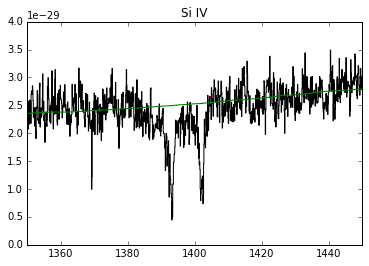

In [28]:
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu'], color='black')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_autocont'], color='green')
# rest_fnu_autocont is the automatically-generated continuum
plt.ylim(0,4E-29)
plt.xlim(1350,1450)
plt.title("Si IV")

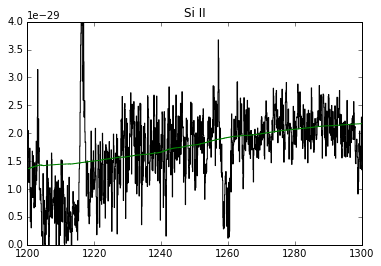

In [29]:
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu'], color='black')
plt.step(sp[thisgal]['rest_wave'], sp[thisgal]['rest_fnu_autocont'], color='green')
plt.ylim(0,4E-29)
plt.xlim(1200,1300)
plt.title("Si II")

In [33]:
#How to loop through spectra:
for galaxy in speclist.index :
    print "Working on galaxy", galaxy, 
    print sp[galaxy]['rest_fnu'].median()  # Do some stupid math

Working on galaxy rcs0327-B 1.0576638556e-29
Working on galaxy rcs0327-E 1.72039407621e-29
Working on galaxy rcs0327-G 1.84742117614e-29
Working on galaxy rcs0327-U 1.45905762261e-29
Working on galaxy rcs0327-counterarc 9.13405868143e-30
Working on galaxy S0004-0103 3.34566404401e-29
Working on galaxy S0033+0242 1.53234188394e-29
Working on galaxy S0108+0624 3.16724511185e-29
Working on galaxy S0900+2234 2.40363529641e-29
Working on galaxy S0957+0509 1.82770326066e-29
Working on galaxy S1050+0017 2.32849761097e-30
Working on galaxy Horseshoe 6.6316311506e-30
Working on galaxy S1226+2152 1.62460700026e-29
Working on galaxy S1429+1202 1.64955705007e-29
Working on galaxy S1458-0023 5.25286719001e-30
Working on galaxy S1527+0652 1.55196938418e-29
Working on galaxy S1527+0652-fnt 1.27574779787e-29
Working on galaxy S2111-0114 7.63625369409e-30
Working on galaxy Cosmic~Eye 1.48668632882e-29
